In [29]:
import pylab as pl
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.svm import SVC


import pandas as pd
import cv2 
from mtcnn.mtcnn import MTCNN
from PIL import Image
import os

In [30]:
print(os.listdir("Images"))

['.DS_Store', 'data']


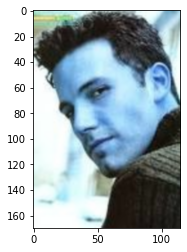

(170, 115, 3)


In [33]:
img = cv2.imread('Images/data/train/ben_afflek/httpcsvkmeuaeccjpg.jpg')
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
#plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()
print(img.shape)

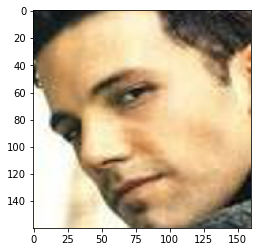

[[[ 25  31  35]
  [ 31  36  40]
  [ 42  46  52]
  ...
  [109 100  95]
  [109 100  93]
  [108  99  92]]

 [[ 24  29  33]
  [ 30  35  38]
  [ 41  45  49]
  ...
  [ 92  83  78]
  [100  91  84]
  [104  95  88]]

 [[ 22  26  29]
  [ 27  31  34]
  [ 37  41  44]
  ...
  [ 64  57  50]
  [ 84  75  68]
  [ 93  84  77]]

 ...

 [[253 254 246]
  [253 254 246]
  [253 254 245]
  ...
  [ 76  78  73]
  [ 89  90  84]
  [ 95  96  90]]

 [[253 255 245]
  [253 255 245]
  [253 255 244]
  ...
  [ 81  83  78]
  [ 98  99  94]
  [106 107 102]]

 [[253 255 244]
  [253 255 244]
  [253 255 243]
  ...
  [ 86  88  83]
  [105 106 101]
  [114 115 110]]]


In [62]:
# extract a single face from a given photograph
def extract_face(filename, required_size=(160, 160)):
    # load image from file
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = np.asarray(image)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    # deal with negative pixel index
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)
    return face_array

# load the photo and extract the face
pixels = extract_face('Images/data/train/ben_afflek/httpcsvkmeuaeccjpg.jpg')
plt.imshow(pixels)
plt.show()
print(pixels)

In [35]:
def load_face(dir):
    faces = list()
    # enumerate files
    for filename in os.listdir(dir):
        path = dir + filename
        face = extract_face(path)
        faces.append(face)
    return faces

def load_dataset(dir):
    # list for faces and labels
    X, y = list(), list()
    for subdir in os.listdir(dir):
        if subdir == ".DS_Store":
            continue
        path = dir + subdir + '/'
        faces = load_face(path)
        labels = [subdir for i in range(len(faces))]
        print("loaded %d sample for class: %s" % (len(faces),subdir) ) # print progress
        X.extend(faces)
        y.extend(labels)
    return np.asarray(X), np.asarray(y)


# load train dataset
trainX, trainy = load_dataset('Images/data/train/')
print(trainX.shape, trainy.shape)
# load test dataset
testX, testy = load_dataset('Images/data/val/')
print(testX.shape, testy.shape)

# save and compress the dataset for further use
# np.savez_compressed('5-celebrity-faces-dataset2.npz', trainX, trainy, testX, testy)
np.savez_compressed('5-celebrity-faces-dataset2.npz', X = trainX, y = trainy)

loaded 14 sample for class: ben_afflek
loaded 19 sample for class: madonna
loaded 17 sample for class: elton_john
loaded 22 sample for class: mindy_kaling
loaded 21 sample for class: jerry_seinfeld
(93, 160, 160, 3) (93,)
loaded 5 sample for class: ben_afflek
loaded 5 sample for class: madonna
loaded 5 sample for class: elton_john
loaded 5 sample for class: mindy_kaling
loaded 5 sample for class: jerry_seinfeld
(25, 160, 160, 3) (25,)


In [97]:
d = np.load("FacesData.npz", allow_pickle=True)
l = d["X"].astype(np.float32) 
l.shape

(1288, 1850)

In [63]:
# load the face dataset
data = np.load('5-celebrity-faces-dataset2.npz')
X, y = data['X'], data['y']
print(X.shape, y.shape)

(93, 160, 160, 3) (93,)


In [3]:
n_samples, h, w = lfw_people.images.shape
np.random.seed(42)

In [119]:
h, w

(50, 37)

In [71]:
X = lfw_people.data
n_features = X.shape[1]

In [98]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [99]:
model = pickle.load(open('finalized_model.sav','rb'))

In [ ]:
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

In [72]:
np.savez_compressed('FacesData.npz', X = X, y = y)

In [117]:
X.shape

(1288, 1850)

In [6]:
print("Total dataset size:")
print("n_samples: %d", n_samples)
print("n_features: %d", n_features)
print("n_classes: %d", n_classes)

Total dataset size:
n_samples: %d 1288
n_features: %d 1850
n_classes: %d 7


In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [78]:
n_components = 50
pca = RandomizedPCA(n_components=n_components, whiten=True).fit(X_train)

In [79]:
eigenfaces = pca.components_.reshape((n_components, h, w))

In [112]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
dd = pca.transform(X)

In [129]:
images = lfw_people.images
images[0]
nx = []
for row in [images[0], images[1]]:
    nx.append(row.flatten())
nx = np.array(nx)
nx.shape

(2, 1850)

In [81]:
print("Fitting the classifier to the training set")
param_grid = {
         'C': [1e3, 5e3, 1e4, 5e4, 1e5],
          'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
          }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced', probability=True), param_grid)
clf = clf.fit(X_train_pca, y_train)
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.01, probability=True)


In [85]:
print("Predicting the people names on the testing set")
y_pred = clf.predict(X_test_pca)
e = clf.predict_proba(X_test_pca)

In [106]:
data = np.load('FacesData.npz')
X, y = data['X'], data['y']

In [111]:
X[1]

array([ 39.666668,  50.333332,  47.      , ..., 117.666664, 115.      ,
       133.66667 ], dtype=float32)

In [83]:
print(classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.62      0.77      0.69        13
     Colin Powell       0.83      0.92      0.87        60
  Donald Rumsfeld       0.67      0.59      0.63        27
    George W Bush       0.86      0.90      0.88       146
Gerhard Schroeder       0.74      0.68      0.71        25
      Hugo Chavez       0.77      0.67      0.71        15
       Tony Blair       0.82      0.64      0.72        36

         accuracy                           0.81       322
        macro avg       0.76      0.74      0.74       322
     weighted avg       0.81      0.81      0.81       322



In [84]:
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

[[ 10   1   1   1   0   0   0]
 [  0  55   1   4   0   0   0]
 [  4   2  16   4   1   0   0]
 [  0   4   5 131   1   2   3]
 [  0   0   1   5  17   1   1]
 [  0   2   0   1   1  10   1]
 [  2   2   0   6   3   0  23]]


In [15]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

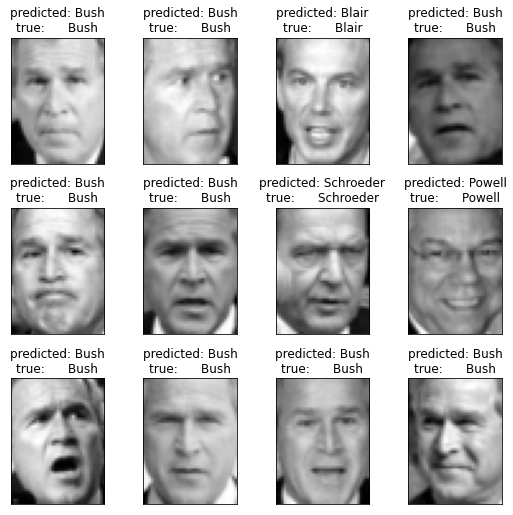

In [16]:
prediction_titles = [title(y_pred, y_test, target_names, i)
                         for i in range(y_pred.shape[0])]
plot_gallery(X_test, prediction_titles, h, w)

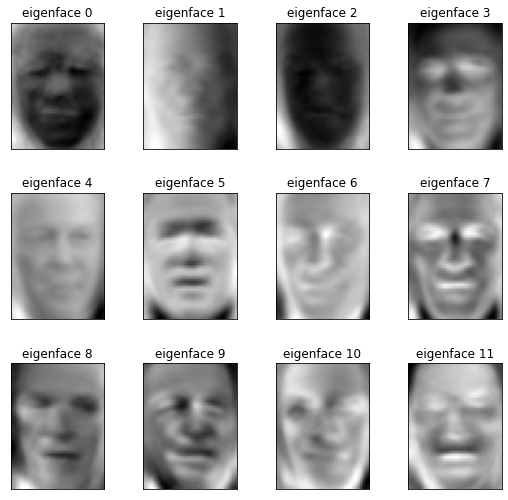

In [17]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)
plt.show()

In [18]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print(score)

0.8198757763975155


In [116]:
target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

In [130]:
for i in range(len(y_test)):
    if y_test[i] != y_pred[i]:
        print(i)

13
16
17
21
23
26
34
37
48
65
68
70
73
78
93
95
101
105
110
112
113
129
133
134
139
148
150
165
168
172
179
182
183
184
199
200
209
210
241
243
249
252
253
256
259
260
262
266
268
274
281
285
290
293
297
301
307
313
316
319


In [131]:
len(y_train)

966

In [132]:
966 + 13

979

In [136]:
X_train

array([[138.66667 , 147.33333 , 148.66667 , ..., 239.33333 , 247.66667 ,
        245.66667 ],
       [164.33333 , 142.66667 , 126.666664, ...,  33.      ,  38.666668,
         43.      ],
       [131.33333 , 132.33333 , 134.33333 , ...,  31.666666,  31.333334,
         29.333334],
       ...,
       [142.33333 , 133.33333 , 133.66667 , ..., 116.      , 118.      ,
        151.33333 ],
       [111.333336, 115.666664, 152.66667 , ...,  54.333332,  49.666668,
         56.      ],
       [ 11.333333,  13.666667,  16.333334, ..., 165.33333 , 182.      ,
        209.      ]], dtype=float32)

In [145]:
np.concatenate((X_test, X_test)) 

array([[103.      , 104.666664, 113.      , ...,  31.      ,  21.      ,
         20.333334],
       [172.      , 170.      , 170.66667 , ..., 253.66667 , 253.33333 ,
        254.      ],
       [140.      , 143.33333 , 147.66667 , ...,  41.      ,  39.333332,
         40.666668],
       ...,
       [156.66667 , 145.33333 , 140.66667 , ...,  25.666666,  38.      ,
         49.666668],
       [ 84.      ,  74.      ,  66.333336, ..., 218.66667 , 226.      ,
        226.33333 ],
       [ 97.666664, 101.666664, 106.666664, ...,  86.333336,  36.      ,
         32.      ]], dtype=float32)

In [146]:
X_train

array([[111.333336, 121.666664, 114.333336, ...,  67.666664,  68.666664,
         70.      ],
       [145.33333 , 163.      , 198.66667 , ..., 155.33333 , 146.      ,
        135.66667 ],
       [162.33333 , 149.33333 , 131.      , ...,  29.      ,  15.333333,
         14.333333],
       ...,
       [156.66667 , 145.33333 , 140.66667 , ...,  25.666666,  38.      ,
         49.666668],
       [ 84.      ,  74.      ,  66.333336, ..., 218.66667 , 226.      ,
        226.33333 ],
       [ 97.666664, 101.666664, 106.666664, ...,  86.333336,  36.      ,
         32.      ]], dtype=float32)